In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json



In [3]:
countryandcounty_path = "Resources/county_income.csv"
countyincome_df = pd.read_csv(countryandcounty_path, encoding="ISO-8859-1")

countyincome_df


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"""00000""",United States,,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,"""00000""",United States,,CAINC1,2.0,...,Population (persons) 1/,Number of persons,201298000,203798722,...,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
2,"""00000""",United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470
3,"""01000""",Alabama,5,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,9737715,10628318,...,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
4,"""01000""",Alabama,5,CAINC1,2.0,...,Population (persons) 1/,Number of persons,3440000,3449846,...,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5031362,5049846,5074296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,"""98000""",Far West,8,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,4570,4855,...,46861,49358,52277,54118,56427,59137,62203,67439,74015,74352
9600,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9601,CAINC1: County and MSA personal income summary...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9602,"Last updated: November 16, 2023-- new statisti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
countyincome_df = countyincome_df.dropna(how = 'any')


In [5]:
countyincome_df = countyincome_df[["GeoName", "Description", "Unit", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]
cleaned_countyincome_df = countyincome_df.rename(columns={"GeoName" : "County"})
cleaned_countyincome_df

,County,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,Personal income (thousands of dollars),Thousands of dollars,13905749000,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,United States,Population (persons) 1/,Number of persons,314344331,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
2,United States,Per capita personal income (dollars) 2/,Dollars,44237,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470
3,Alabama,Personal income (thousands of dollars),Thousands of dollars,172101458,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
4,Alabama,Population (persons) 1/,Number of persons,4839261,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5031362,5049846,5074296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,Rocky Mountain,Population (persons) 1/,Number of persons,11230078,11386485,11539776,11721767,11915924,12094213,12268132,12427477,12582532,12740434,12864007
9596,Rocky Mountain,Per capita personal income (dollars) 2/,Dollars,41403,42341,44714,46176,46483,48773,51651,54641,58260,64123,67169
9597,Far West,Personal income (thousands of dollars),Thousands of dollars,2501102067,2536151947,2697504923,2886096453,3016423051,3169740963,3339906496,3524619652,3828494482,4179488126,4193955215
9598,Far West,Population (persons) 1/,Number of persons,53650540,54120872,54651324,55207598,55738346,56174005,56477384,56663461,56770093,56467775,56406816


In [6]:
county_income_df = cleaned_countyincome_df.loc[cleaned_countyincome_df["Description"] == "Per capita personal income (dollars) 2/"]
county_income_df = county_income_df.loc[cleaned_countyincome_df["Unit"] == "Dollars"]

county_income_df.head()

,County,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,United States,Per capita personal income (dollars) 2/,Dollars,44237,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470
5,Alabama,Per capita personal income (dollars) 2/,Dollars,35564,35713,36729,38197,38712,39975,41330,43004,45887,50059,50916
8,"Autauga, AL",Per capita personal income (dollars) 2/,Dollars,35161,35364,36347,38130,39022,39922,41076,42550,45151,48914,49391
11,"Baldwin, AL",Per capita personal income (dollars) 2/,Dollars,38307,38428,39598,41502,43012,44498,45852,47911,51230,55865,56747
14,"Barbour, AL",Per capita personal income (dollars) 2/,Dollars,27759,29422,29436,31024,31035,31963,33211,34685,37111,40795,40560


In [7]:
county_income_df.count()

County         3200
Description    3200
Unit           3200
2012           3200
2013           3200
2014           3200
2015           3200
2016           3200
2017           3200
2018           3200
2019           3200
2020           3200
2021           3200
2022           3200
dtype: int64

In [8]:

only_county_df = county_income_df.loc[~county_income_df['County'].isin(['Alabama', 'Plains', 'United States', 'Southeast', 'Southwest', 'Far West', 
                                                                       'Rocky Mountain', 'Great Lakes', 'Mideast', 'New England', 'Alaska', 'Arizona',
                                                                       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
                                                                       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 
                                                                       'Kentucky', 'Louisiana', 'Maine', 'Massachusetts', 'Michigan', 'Minnesota',
                                                                       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                                                                       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'North Dakota',
                                                                       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
                                                                       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
                                                                       'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia'])]


only_county_df

,County,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
8,"Autauga, AL",Per capita personal income (dollars) 2/,Dollars,35161,35364,36347,38130,39022,39922,41076,42550,45151,48914,49391
11,"Baldwin, AL",Per capita personal income (dollars) 2/,Dollars,38307,38428,39598,41502,43012,44498,45852,47911,51230,55865,56747
14,"Barbour, AL",Per capita personal income (dollars) 2/,Dollars,27759,29422,29436,31024,31035,31963,33211,34685,37111,40795,40560
17,"Bibb, AL",Per capita personal income (dollars) 2/,Dollars,26914,27116,27859,28760,28584,28877,30033,32104,34938,37175,37513
20,"Blount, AL",Per capita personal income (dollars) 2/,Dollars,29727,30033,31309,32469,32532,33781,35275,36561,38133,42852,43744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,"Sweetwater, WY",Per capita personal income (dollars) 2/,Dollars,47794,48236,49389,49514,47708,51064,54797,55848,54708,56252,58374
9566,"Teton, WY",Per capita personal income (dollars) 2/,Dollars,190216,171491,190789,187694,195804,220415,214681,260038,300665,362522,406054
9569,"Uinta, WY",Per capita personal income (dollars) 2/,Dollars,39936,39376,39107,38836,37430,38191,39688,40788,42289,44358,44775
9572,"Washakie, WY",Per capita personal income (dollars) 2/,Dollars,41869,41500,44221,43533,42080,44178,47630,48056,55098,54898,55288


In [9]:
only_county_df.to_csv("C:/Users/Jenna/Project1/county.csv", index_label="None")


In [10]:
county_name = "Autauga , AL"
print(county_name.split(",")[0].strip())

Autauga


In [11]:

only_county_df.reset_index(drop=True, inplace=True)

In [12]:
only_county_df["County"].unique()


array(['Autauga, AL', 'Baldwin, AL', 'Barbour, AL', ..., 'Uinta, WY',
       'Washakie, WY', 'Weston, WY'], dtype=object)

In [13]:
only_county_df["Location"] = only_county_df.County.apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')
only_county_df

C:\Users\jenna\AppData\Local\Temp\ipykernel_19180\1073917614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_county_df["Location"] = only_county_df.County.apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')


,County,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Location
0,"Autauga, AL",Per capita personal income (dollars) 2/,Dollars,35161,35364,36347,38130,39022,39922,41076,42550,45151,48914,49391,AL
1,"Baldwin, AL",Per capita personal income (dollars) 2/,Dollars,38307,38428,39598,41502,43012,44498,45852,47911,51230,55865,56747,AL
2,"Barbour, AL",Per capita personal income (dollars) 2/,Dollars,27759,29422,29436,31024,31035,31963,33211,34685,37111,40795,40560,AL
3,"Bibb, AL",Per capita personal income (dollars) 2/,Dollars,26914,27116,27859,28760,28584,28877,30033,32104,34938,37175,37513,AL
4,"Blount, AL",Per capita personal income (dollars) 2/,Dollars,29727,30033,31309,32469,32532,33781,35275,36561,38133,42852,43744,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,"Sweetwater, WY",Per capita personal income (dollars) 2/,Dollars,47794,48236,49389,49514,47708,51064,54797,55848,54708,56252,58374,WY
3137,"Teton, WY",Per capita personal income (dollars) 2/,Dollars,190216,171491,190789,187694,195804,220415,214681,260038,300665,362522,406054,WY
3138,"Uinta, WY",Per capita personal income (dollars) 2/,Dollars,39936,39376,39107,38836,37430,38191,39688,40788,42289,44358,44775,WY
3139,"Washakie, WY",Per capita personal income (dollars) 2/,Dollars,41869,41500,44221,43533,42080,44178,47630,48056,55098,54898,55288,WY


In [14]:
only_county_df["County"] = only_county_df.County.apply(lambda x: x.split(',')[0].strip() if len(x.split(',')) > 1 else '')
only_county_df

C:\Users\jenna\AppData\Local\Temp\ipykernel_19180\2440024880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_county_df["County"] = only_county_df.County.apply(lambda x: x.split(',')[0].strip() if len(x.split(',')) > 1 else '')


,County,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Location
0,Autauga,Per capita personal income (dollars) 2/,Dollars,35161,35364,36347,38130,39022,39922,41076,42550,45151,48914,49391,AL
1,Baldwin,Per capita personal income (dollars) 2/,Dollars,38307,38428,39598,41502,43012,44498,45852,47911,51230,55865,56747,AL
2,Barbour,Per capita personal income (dollars) 2/,Dollars,27759,29422,29436,31024,31035,31963,33211,34685,37111,40795,40560,AL
3,Bibb,Per capita personal income (dollars) 2/,Dollars,26914,27116,27859,28760,28584,28877,30033,32104,34938,37175,37513,AL
4,Blount,Per capita personal income (dollars) 2/,Dollars,29727,30033,31309,32469,32532,33781,35275,36561,38133,42852,43744,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Sweetwater,Per capita personal income (dollars) 2/,Dollars,47794,48236,49389,49514,47708,51064,54797,55848,54708,56252,58374,WY
3137,Teton,Per capita personal income (dollars) 2/,Dollars,190216,171491,190789,187694,195804,220415,214681,260038,300665,362522,406054,WY
3138,Uinta,Per capita personal income (dollars) 2/,Dollars,39936,39376,39107,38836,37430,38191,39688,40788,42289,44358,44775,WY
3139,Washakie,Per capita personal income (dollars) 2/,Dollars,41869,41500,44221,43533,42080,44178,47630,48056,55098,54898,55288,WY


In [15]:
years = only_county_df[["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]
year2 = years = only_county_df[['County', "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(years)

income_columns = df.columns[df.columns.str.isnumeric()]

df[income_columns] = df[income_columns].apply(pd.to_numeric, errors='coerce')

df['Average_Income'] = df[income_columns].mean(axis=1)

df_plot = df.melt(var_name='Year', value_name='Income')

df_plot['Year'] = df_plot['Year'].str.extract('(\d+)', expand=False)


df_plot['Year'] = pd.to_numeric(df_plot['Year'], errors='coerce')

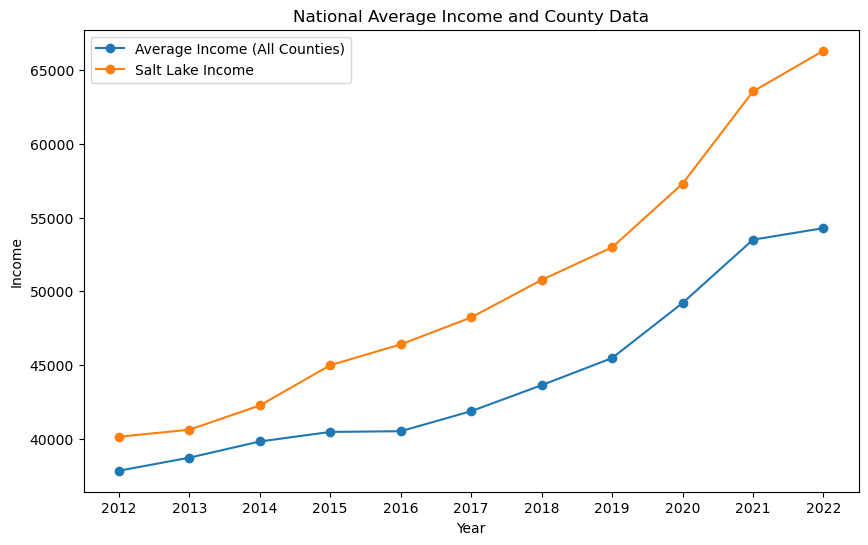

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "Salt Lake"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/Salt_Lake.png")

plt.show()

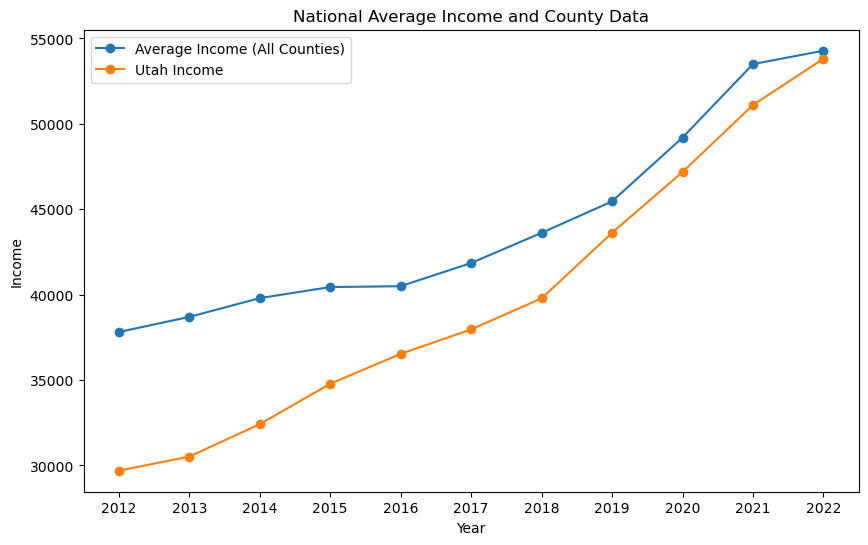

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "Utah"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/Utah_County.png")

plt.show()

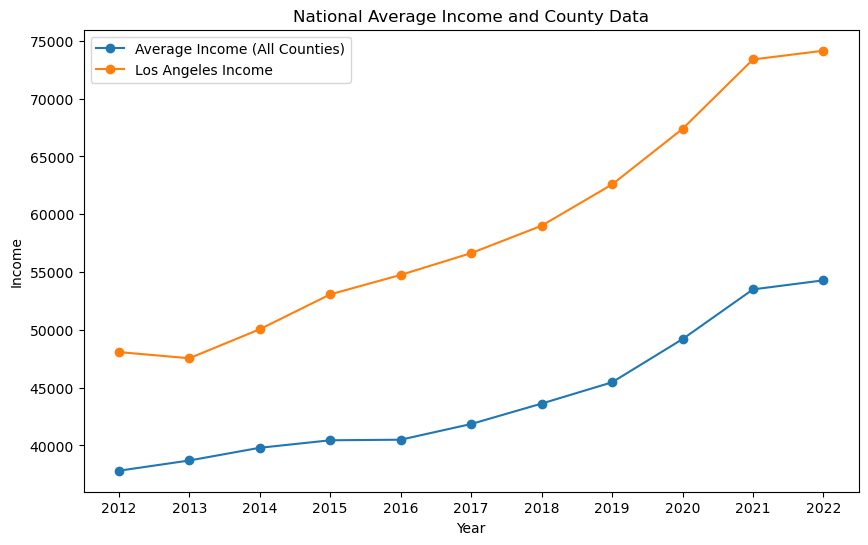

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "Los Angeles"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/Los_Angeles.png")

plt.show()

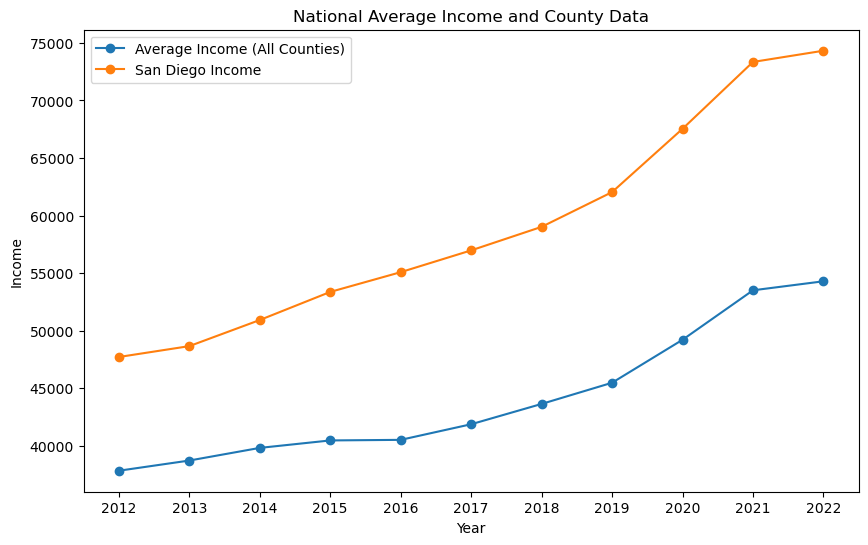

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "San Diego"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/San_Diego.png")

plt.show()

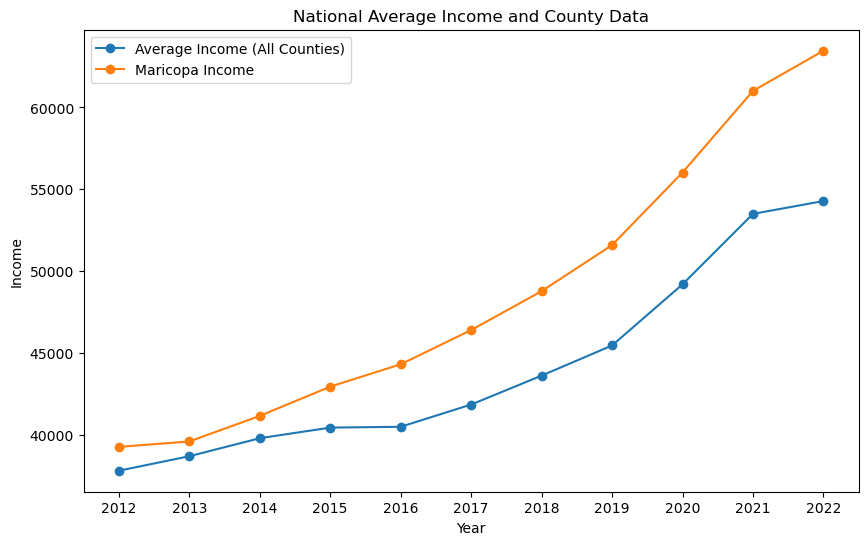

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "Maricopa"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/Maricopa.png")

plt.show()

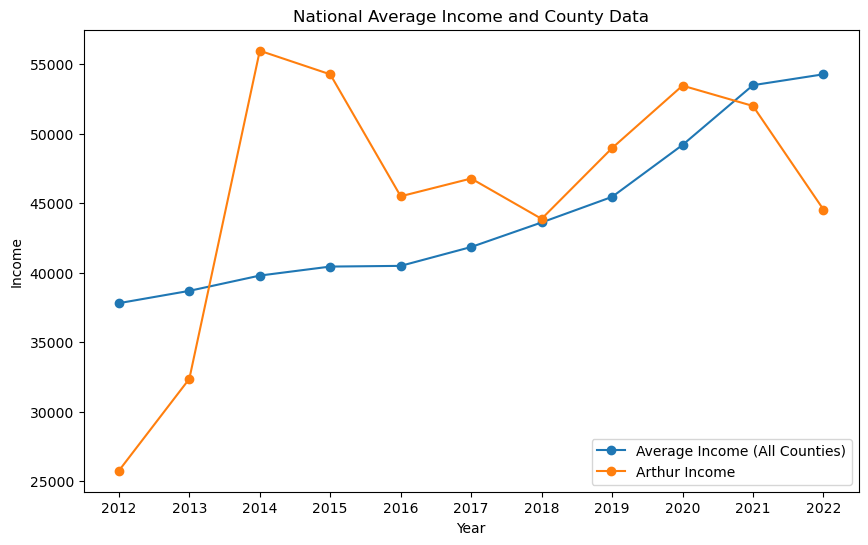

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "Arthur"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/Arthur.png")

plt.show()

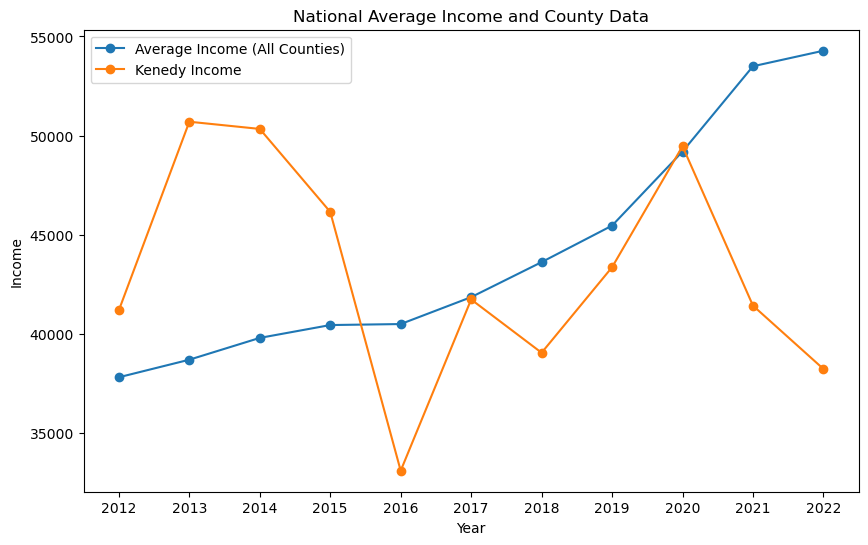

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "Kenedy"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/Kenedy.png")

plt.show()

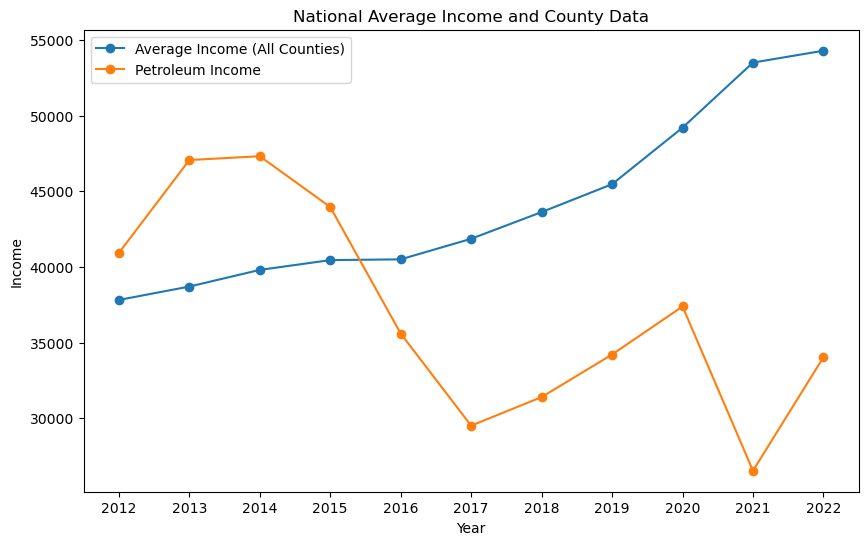

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

county_to_compare = "Petroleum"
row_to_compare = df.loc[county_to_compare, numeric_columns]

one_county_df = pd.DataFrame({'Year': row_to_compare.index, 'Income': row_to_compare.values}).reset_index(drop=True)

average_income_all_counties = df[numeric_columns].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_income_all_counties, label='Average Income (All Counties)', marker='o')

plt.plot(one_county_df['Year'], one_county_df['Income'], label=f'{county_to_compare} Income', marker='o')

plt.title('National Average Income and County Data')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()

plt.savefig("C:/Users/jenna/Project1/Images/Petroleum.png")

plt.show()

In [18]:
# T-Test

only_county_df

,County,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Location
0,Autauga,Per capita personal income (dollars) 2/,Dollars,35161,35364,36347,38130,39022,39922,41076,42550,45151,48914,49391,AL
1,Baldwin,Per capita personal income (dollars) 2/,Dollars,38307,38428,39598,41502,43012,44498,45852,47911,51230,55865,56747,AL
2,Barbour,Per capita personal income (dollars) 2/,Dollars,27759,29422,29436,31024,31035,31963,33211,34685,37111,40795,40560,AL
3,Bibb,Per capita personal income (dollars) 2/,Dollars,26914,27116,27859,28760,28584,28877,30033,32104,34938,37175,37513,AL
4,Blount,Per capita personal income (dollars) 2/,Dollars,29727,30033,31309,32469,32532,33781,35275,36561,38133,42852,43744,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Sweetwater,Per capita personal income (dollars) 2/,Dollars,47794,48236,49389,49514,47708,51064,54797,55848,54708,56252,58374,WY
3137,Teton,Per capita personal income (dollars) 2/,Dollars,190216,171491,190789,187694,195804,220415,214681,260038,300665,362522,406054,WY
3138,Uinta,Per capita personal income (dollars) 2/,Dollars,39936,39376,39107,38836,37430,38191,39688,40788,42289,44358,44775,WY
3139,Washakie,Per capita personal income (dollars) 2/,Dollars,41869,41500,44221,43533,42080,44178,47630,48056,55098,54898,55288,WY


In [19]:
import warnings
warnings.filterwarnings('ignore')


In [20]:
only_county_df.columns

Index(['County', 'Description', 'Unit', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'Location'],
      dtype='object')

In [21]:
from scipy.stats import ttest_ind

df = pd.DataFrame(year2)

df = df.set_index("County")

numeric_columns = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

average_income_all_counties = df[numeric_columns].mean(axis=0)

counties_to_compare = ['Los Angeles', 'Maricopa', 'San Diego', 'Arthur', 'Kenedy', 'Petroleum']

counties_df = df.loc[counties_to_compare, numeric_columns]

t_test_results = []

for county in counties_to_compare:
    t_statistic, p_value = ttest_ind(counties_df.loc[county], average_income_all_counties)
    t_test_results.append({'County': county, 'T-statistic': t_statistic, 'P-value': p_value})

t_test_results_df = pd.DataFrame(t_test_results)
print(t_test_results_df)


        County  T-statistic   P-value
0  Los Angeles     4.359297  0.000304
1     Maricopa     1.449161  0.162792
2    San Diego     4.482878  0.000228
3       Arthur     0.503681  0.619989
4       Kenedy    -0.390198  0.700515
5    Petroleum    -2.564175  0.018504
